# 4. Modeling

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

/Users/sedkin/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
Location = r'../final_3/clean_data.csv'
df = pd.read_csv(Location,  encoding='utf-8')

In [3]:
df.head()

,article_description,article_pubtime,article_section,article_subtopic,article_tags,article_topic,author_name,content,title
0,If you're having trouble trying to be more inn...,2016-11-11T20:00:15+00:00,Planning for Growth,Growth Opportunities,"[Growth Opportunities, Innovation, Personal Pr...",Planning for Growth,Heather Willems,The Power of Non-Linear ThinkingHeather Willem...,The Power of Non-Linear Thinking
1,Huge growth may be possible for businesses of ...,2016-11-09T22:30:34+00:00,Planning for Growth,Operations,"[Business Expansion, Business Plan, Cash Flow,...",Planning for Growth,Andrew J. Sherman,3 Growth Strategies for Businesses With Limite...,3 Growth Strategies for Businesses With Limite...
2,What sets your business apart from the competi...,2016-11-11T22:30:47+00:00,Getting Customers,Marketing & Sales,"[Advertising, Brainstorming, Branding, Busines...",Getting Customers,Rieva Lesonsky,USP 101: How to Uncover Your Unique Selling Pr...,USP 101: How to Uncover Your Unique Selling Pr...
3,"Organizational changes are rarely fun or easy,...",2016-11-03T23:30:02+00:00,Building Your Team,Company Culture,"[Building Your Team, Business Expansion, Busin...",Building Your Team,David Niu,8 Strategies for Big (or Small) Organizational...,8 Strategies for Big (or Small) Organizational...
4,"When expanding your business, exporting to int...",2016-10-27T19:00:39+00:00,Planning for Growth,Growth Opportunities,"[Growth Opportunities, Importing & Exporting, ...",Planning for Growth,Greg Sandler,Lessons Learned: Four Stories From Experienced...,Lessons Learned: Four Stories From Experienced...


In [4]:
df['article_section'].value_counts()

Building Your Team     26
Getting Customers      26
Planning for Growth    19
Managing Money         12
Name: article_section, dtype: int64

In [5]:
df['article_subtopic'].value_counts()

Customer Relations       12
Leadership               12
Marketing & Sales         9
Company Culture           8
Growth Opportunities      8
Cash Flow                 6
Hiring & HR               6
Strategy                  4
Taxes                     4
Social Media Strategy     3
Research                  3
Operations                3
Financing                 2
Digital Tools             2
Productivity              1
Name: article_subtopic, dtype: int64

In [6]:
#df[df['author_name'] == 'David Niu']

In [7]:
# split data into train and test sets
from sklearn.cross_validation import train_test_split
data_train, data_test = train_test_split(df, test_size=0.33, random_state=42)
len(data_train)

data_train.head()
labels = data_train['article_subtopic']
print "Labels \n", labels.head()

labels_test = data_test['article_subtopic']

Labels 
16                 Strategy
39                    Taxes
62    Social Media Strategy
72              Hiring & HR
7                  Research
Name: article_subtopic, dtype: object


In [8]:
growth_opp = df[df['article_subtopic'] == 'Growth Opportunities']
hiring_hr = df[df['article_subtopic'] == 'Hiring & HR']
print len(hiring_hr)
hiring_labels = pd.Series(["Hiring & HR","Hiring & HR","Hiring & HR","Hiring & HR","Hiring & HR","Hiring & HR"])
len(hiring_labels)

6


6

In [9]:
# vectorize
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(max_features = 50, 
                             ngram_range=(1, 3), 
                             stop_words='english',
                             binary=True)
X_train_counts = count_vect.fit(data_train['content'])
#X_train_counts.shape
X_train_counts = count_vect.transform(data_train['content'])
names =  count_vect.get_feature_names()
names[115:145]

[]

In [10]:
count_vect.vocabulary_.get(u'business')

7

In [11]:
count_vect.vocabulary_.get(u'employees')

In [12]:
count_vect.vocabulary_.get(u'stock')

In [13]:
count_vect.vocabulary_.get(u'bread')

In [14]:
# vectorize with tf-idf 
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
print X_train_tf.shape

names = count_vect.get_feature_names()
names[50:100]

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print X_train_tfidf.shape

(55, 50)
(55, 50)


In [15]:
# use Naive-Bayes Classifier 
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_counts, labels)

In [16]:
print labels[0:5]

16                 Strategy
39                    Taxes
62    Social Media Strategy
72              Hiring & HR
7                  Research
Name: article_subtopic, dtype: object


In [17]:
# Test the classifier 
docs_new = ['Business strategy is important.', 
            "Hiring new employees is tough because candidates are hard to find.", 
            "Candidates hire new employees", 
            "Web SEO mobile",
           "Attracting new customers through advertising",
           "Employee benefits",
           "Economic Ups and Downs",
           "Ups and Downs",
           "Customer stuff",
           "mobile",
           "digital",
           "The Power of Non-Linear Thinking",
           "3 Growth Strategies for Businesses With Limited"]
X_new_counts = count_vect.transform(docs_new)

X_new_tf = tf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tf)

for doc, category in zip(docs_new, predicted):
     print('%r => %s' % (doc, category))

'Business strategy is important.' => Leadership
'Hiring new employees is tough because candidates are hard to find.' => Customer Relations
'Candidates hire new employees' => Customer Relations
'Web SEO mobile' => Leadership
'Attracting new customers through advertising' => Customer Relations
'Employee benefits' => Leadership
'Economic Ups and Downs' => Leadership
'Ups and Downs' => Leadership
'Customer stuff' => Leadership
'mobile' => Leadership
'digital' => Leadership
'The Power of Non-Linear Thinking' => Leadership
'3 Growth Strategies for Businesses With Limited' => Customer Relations


In [18]:
# creates a pipeline 
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', MultinomialNB()),
 ])

In [19]:
text_clf = text_clf.fit(data_train['content'], labels)

In [20]:
# get prediction accuracy using the test set
docs_test = data_test['content']
#print docs_test
predicted = text_clf.predict(docs_test)
#print predicted
np.mean(predicted == labels_test) 
text_clf.score(docs_test, labels_test)

0.035714285714285712

In [21]:
print data_train['article_subtopic'].value_counts()

Leadership               11
Customer Relations        9
Company Culture           6
Marketing & Sales         5
Hiring & HR               4
Strategy                  3
Taxes                     3
Operations                3
Cash Flow                 2
Financing                 2
Research                  2
Growth Opportunities      2
Social Media Strategy     1
Digital Tools             1
Productivity              1
Name: article_subtopic, dtype: int64


My classifier is only bucketing documents into two categories, despite feeding it several categories. This might be because there are a lot of "Leadership" and "Customer Relations" articles and not as many of the other categories.

Let's try it again using categories that all have the same number of observations - to see if that was causing it.

In [22]:
categories = ['Cash Flow', 'Financing', 'Research', 'Growth Opportunities', 'Strategy','Taxes', 'Operations']
# categories = ['Building Your Team', 'Getting Customers', 'Planning for Growth']
train_dropped = data_train[data_train['article_subtopic'].isin(categories)]
train_dropped.head(2)

,article_description,article_pubtime,article_section,article_subtopic,article_tags,article_topic,author_name,content,title
16,Small businesses can be just as volatile as th...,2016-08-23T22:30:24+00:00,Planning for Growth,Strategy,"[Accounts Receivable/Payable, Building Your Te...",Planning for Growth,Julie Bawden Davis,Economic Ups and Downs: How to Help Prepare Yo...,Economic Ups and Downs: How to Help Prepare Yo...
39,Being as tax-savvy as possible can help you—an...,2016-09-29T17:00:01+00:00,Managing Money,Taxes,"[Cash Flow, Managing Money, Tax Deductions, Ta...",Managing Money,John Suh,4 Things Every Business Owner Should Know Abou...,4 Things Every Business Owner Should Know Abou...


In [23]:
# vectorize
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(max_features = 50, 
                             ngram_range=(1, 3), 
                             stop_words='english',
                             binary=True)
X_train_counts = count_vect.fit(train_dropped['content'])
#X_train_counts.shape
X_train_counts = count_vect.transform(train_dropped['content'])
names =  count_vect.get_feature_names()
names[115:145]

# vectorize with tf-idf 
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
print X_train_tf.shape

names = count_vect.get_feature_names()
names[50:100]

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print X_train_tfidf.shape

# use Naive-Bayes Classifier 
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_counts, train_dropped['article_subtopic'])

# Test the classifier 
docs_new = ['Business strategy is important.', 
            "Hiring new employees is tough because candidates are hard to find.", 
            "Candidates hire new employees", 
            "Web SEO mobile",
           "Attracting new customers through advertising",
           "Employee benefits",
           "Economic Ups and Downs",
           "Ups and Downs",
           "Customer stuff",
           "mobile",
           "digital",
           "The Power of Non-Linear Thinking",
           "3 Growth Strategies for Businesses With Limited"]
X_new_counts = count_vect.transform(docs_new)

X_new_tf = tf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tf)

for doc, category in zip(docs_new, predicted):
     print('%r => %s' % (doc, category))

(17, 50)
(17, 50)
'Business strategy is important.' => Taxes
'Hiring new employees is tough because candidates are hard to find.' => Strategy
'Candidates hire new employees' => Strategy
'Web SEO mobile' => Operations
'Attracting new customers through advertising' => Strategy
'Employee benefits' => Operations
'Economic Ups and Downs' => Operations
'Ups and Downs' => Operations
'Customer stuff' => Operations
'mobile' => Operations
'digital' => Operations
'The Power of Non-Linear Thinking' => Operations
'3 Growth Strategies for Businesses With Limited' => Operations


In [24]:
test_dropped = data_test[data_test['article_subtopic'].isin(categories)]
test_dropped.head(2)

,article_description,article_pubtime,article_section,article_subtopic,article_tags,article_topic,author_name,content,title
30,"As your business grows, you may want to consid...",2016-11-08T17:30:05+00:00,Managing Money,Cash Flow,"[Accounting, Cash Flow, Managing Money]",Managing Money,Hal Shelton,"When It Comes to Accounting, Do You Need a CPA...","When It Comes to Accounting, Do You Need a CPA..."
0,If you're having trouble trying to be more inn...,2016-11-11T20:00:15+00:00,Planning for Growth,Growth Opportunities,"[Growth Opportunities, Innovation, Personal Pr...",Planning for Growth,Heather Willems,The Power of Non-Linear ThinkingHeather Willem...,The Power of Non-Linear Thinking


In [25]:
text_clf = text_clf.fit(train_dropped['content'], train_dropped['article_subtopic'])

# get prediction accuracy using the test set
docs_test = test_dropped['content']
predicted = text_clf.predict(docs_test)
#print "Predicted:", predicted
np.mean(predicted == test_dropped['article_subtopic']) 
#test_dropped['article_subtopic']

0.15384615384615385

My accuracy slightly increased.. Promising! LOL.

The issues are:
1) there isn't enough data, and
2) there are too many buckets and the articles are not distributed evenly amongst them

### Attempting again
 Improvements:
 1) using article_topic instead of article_subtopic to have less buckets
 2) increase train set size 

In [26]:
# split data into train and test sets
from sklearn.cross_validation import train_test_split
topic_train, topic_test = train_test_split(df, test_size=0.18, random_state=42)
print "Train set len:", len(topic_train)
print "Test set len:", len(topic_test)

topic_train.head()
topic_labels = topic_train['article_topic']
print "Train Labels \n", topic_labels.value_counts()

topic_labels_test = topic_test['article_topic']
print "Test Labels \n", topic_labels_test.value_counts()

Train set len: 68
Test set len: 15
Train Labels 
Building Your Team     24
Getting Customers      24
Planning for Growth    12
Managing Money          8
Name: article_topic, dtype: int64
Test Labels 
Planning for Growth    7
Managing Money         4
Building Your Team     2
Getting Customers      2
Name: article_topic, dtype: int64


In [27]:
# vectorize
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(max_features = 100, 
                             ngram_range=(1, 3), 
                             stop_words='english',
                             binary=False
                            )
X_train_counts = count_vect.fit(topic_train['content'])
#X_train_counts.shape
X_train_counts = count_vect.transform(topic_train['content'])
names =  count_vect.get_feature_names()

# view snapshot of some the words found
names[0:10]

[u'000',
 u'alignment',
 u'alignment center',
 u'american',
 u'american express',
 u'article',
 u'articles',
 u'ask',
 u'author',
 u'based']

In [28]:
# vectorize with tf-idf 
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)

names = count_vect.get_feature_names()
print names[50:100]

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print X_train_tfidf.shape

[u'media', u'money', u'need', u'new', u'open', u'owner', u'owners', u'pay', u'people', u'percent', u'photo', u'plan', u'process', u'product', u'products', u'professional', u'pullquote', u'pullquote showtweet', u'pullquote showtweet false', u'read', u'read articles', u'sales', u'says', u'self', u'service', u'showtweet', u'showtweet false', u'small', u'small business', u'social', u'social media', u'start', u'tax', u'team', u'theyre', u'things', u'think', u'time', u'twitter', u'use', u'using', u'want', u'way', u'ways', u'website', u'work', u'working', u'year', u'years', u'youre']
(68, 100)


In [29]:
# use Naive-Bayes Classifier 
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_counts, topic_labels)

In [30]:
# Test the classifier (article_topics version)
docs_new = ['Business strategy is important.', 
            "Hiring new employees is tough because candidates are hard to find.", 
            "Candidates hire new employees", 
            "Web SEO mobile strategy",
           "Attracting new customers through advertising",
           "Employee benefits",
           "Economic Ups and Downs",
           "Ups and Downs",
           "Customers are happy when you do this",
           "what"]
X_new_counts = count_vect.transform(docs_new)
X_new_tf = tf_transformer.transform(X_new_counts)
predicted = clf.predict(X_new_tf)

for doc, category in zip(docs_new, predicted):
     print('%r => %s' % (doc, category))
        
print "\n Predict Probabilities:"        
print clf.predict_proba(X_new_tf)        

'Business strategy is important.' => Building Your Team
'Hiring new employees is tough because candidates are hard to find.' => Building Your Team
'Candidates hire new employees' => Building Your Team
'Web SEO mobile strategy' => Building Your Team
'Attracting new customers through advertising' => Getting Customers
'Employee benefits' => Building Your Team
'Economic Ups and Downs' => Building Your Team
'Ups and Downs' => Building Your Team
'Customers are happy when you do this' => Getting Customers
'what' => Building Your Team

 Predict Probabilities:
[[ 0.36921214  0.28836502  0.12046992  0.22195292]
 [ 0.59999164  0.12582559  0.06349306  0.2106897 ]
 [ 0.59999164  0.12582559  0.06349306  0.2106897 ]
 [ 0.35294118  0.35294118  0.11764706  0.17647059]
 [ 0.12534883  0.61058736  0.01719338  0.24687043]
 [ 0.35294118  0.35294118  0.11764706  0.17647059]
 [ 0.35294118  0.35294118  0.11764706  0.17647059]
 [ 0.35294118  0.35294118  0.11764706  0.17647059]
 [ 0.09381467  0.70651951  0.01317

In [32]:
docs_test = topic_test['content']


In [33]:
# Test the classifier (article_topics version)
docs_new = topic_test['content']
X_new_counts = count_vect.transform(docs_new)
X_new_tf = tf_transformer.transform(X_new_counts)
predicted = clf.predict(X_new_tf)

label_and_pred = pd.DataFrame(predicted)
pd.concat([pd.DataFrame(predicted), topic_labels_test])
    
pd.DataFrame({ 'Predicted Value' : predicted, 'Actual Value': topic_labels_test})    

,Actual Value,Predicted Value
30,Managing Money,Managing Money
0,Planning for Growth,Building Your Team
22,Planning for Growth,Planning for Growth
31,Managing Money,Managing Money
18,Planning for Growth,Planning for Growth
28,Managing Money,Planning for Growth
10,Planning for Growth,Planning for Growth
53,Getting Customers,Getting Customers
4,Planning for Growth,Planning for Growth
12,Planning for Growth,Building Your Team


In [34]:
# clf.score(X_new_tf, topic_labels_test)  # .615
clf.score(X_new_tf, topic_labels_test)

0.66666666666666663

### Try a different classifier - KNN

In [35]:
# KNN with tf only
from sklearn.neighbors import KNeighborsClassifier

count_vect = CountVectorizer(max_features = 100, # only consider the top max_features ordered by term frequency across the corpus
                             ngram_range=(1, 3), # a , a b, a b c
                             stop_words='english',
                             binary=False # leave numerical values
                            )  

X_train_counts = count_vect.fit_transform(topic_train['content'])

X = X_train_counts  # vectorized content
y = topic_labels
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X, y)

X_test = tf_transformer.transform(count_vect.transform(topic_test['content']))
y_test = topic_labels_test
neigh.score(X_test, y_test)

0.13333333333333333

In [36]:
# KNN with tf-idf
tfidf_transformer = TfidfTransformer(use_idf=True)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X = X_train_tfidf  # vectorized content
y = topic_labels
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X, y)

X_test = tf_transformer.transform(count_vect.transform(topic_test['content']))
y_test = topic_labels_test
neigh.score(X_test, y_test)

0.53333333333333333

Modifying the vectorizer helped a lot. And TF-IDF definitely helps for normalization. 
But still not great.

### Cross Validation

In [37]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(MultinomialNB(), X, y, cv=8)
print "Scores:", scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores: [ 0.55555556  0.66666667  0.77777778  0.77777778  0.75        0.75        0.625
  0.75      ]
Accuracy: 0.71 (+/- 0.15)


In [38]:
# Cross-val on the whole dataset 
X = count_vect.fit_transform(df['content'])
X = tfidf_transformer.fit_transform(X)
y = df['article_topic']

scores = cross_val_score(MultinomialNB(), X, y, cv=8)
print "Scores:", scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores: [ 0.76923077  0.61538462  0.54545455  0.7         0.88888889  0.77777778
  0.88888889  0.88888889]
Accuracy: 0.76 (+/- 0.25)


In [39]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=4), X, y, cv=8)
print "Scores:", scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores: [ 0.69230769  0.53846154  0.63636364  0.6         0.66666667  0.88888889
  0.77777778  0.66666667]
Accuracy: 0.68 (+/- 0.20)


#### Random Forest


In [40]:
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(RandomForestClassifier(n_estimators=100), X, y, cv=8)
print "Scores:", scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores: [ 0.76923077  0.30769231  0.72727273  0.6         0.66666667  0.44444444
  0.77777778  0.88888889]
Accuracy: 0.65 (+/- 0.36)


### Gensim


In [41]:
from sklearn.feature_extraction.text import CountVectorizer

docs = X_train_counts

# Build a mapping of numerical ID to word
id2word = dict(enumerate(count_vect.get_feature_names()))
id2word

{0: u'000',
 1: u'advice',
 2: u'alignment',
 3: u'alignment center',
 4: u'american',
 5: u'american express',
 6: u'article',
 7: u'articles',
 8: u'ask',
 9: u'author',
 10: u'based',
 11: u'best',
 12: u'better',
 13: u'business',
 14: u'business owners',
 15: u'businesses',
 16: u'cash',
 17: u'center',
 18: u'ceo',
 19: u'companies',
 20: u'company',
 21: u'consider',
 22: u'content',
 23: u'create',
 24: u'credit',
 25: u'customer',
 26: u'customers',
 27: u'day',
 28: u'different',
 29: u'dont',
 30: u'employees',
 31: u'experience',
 32: u'express',
 33: u'false',
 34: u'financial',
 35: u'founder',
 36: u'going',
 37: u'good',
 38: u'great',
 39: u'growth',
 40: u'health',
 41: u'help',
 42: u'im',
 43: u'important',
 44: u'information',
 45: u'insurance',
 46: u'just',
 47: u'know',
 48: u'like',
 49: u'make',
 50: u'market',
 51: u'marketing',
 52: u'media',
 53: u'money',
 54: u'need',
 55: u'new',
 56: u'open',
 57: u'opinion',
 58: u'owners',
 59: u'pay',
 60: u'people',

In [42]:
from gensim.models.ldamodel import LdaModel
from gensim.matutils import Sparse2Corpus

# First we convert our word-matrix into gensim's format
corpus = Sparse2Corpus(docs, documents_columns = False)

# Then we fit an LDA model
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=4)

In [43]:
docs.toarray().shape

(68, 100)

In [44]:
lda_model.print_topics(15)

[(0,
  u'0.041*credit + 0.034*better + 0.031*create + 0.030*sales + 0.030*growth + 0.027*dont + 0.022*know + 0.022*think + 0.022*money + 0.020*just'),
 (1,
  u'0.039*better + 0.035*small + 0.031*using + 0.028*owners + 0.028*time + 0.026*company + 0.026*growth + 0.024*market + 0.024*youre + 0.023*small business'),
 (2,
  u'0.090*better + 0.033*read articles + 0.028*think + 0.024*growth + 0.023*ceo + 0.021*work + 0.019*dont + 0.018*know + 0.018*showtweet + 0.017*owners'),
 (3,
  u'0.085*better + 0.031*social media + 0.026*ceo + 0.025*content + 0.022*growth + 0.019*think + 0.018*read articles + 0.017*credit + 0.016*showtweet + 0.015*owners')]

In [45]:
df.content.head()

0    The Power of Non-Linear ThinkingHeather Willem...
1    3 Growth Strategies for Businesses With Limite...
2    USP 101: How to Uncover Your Unique Selling Pr...
3    8 Strategies for Big (or Small) Organizational...
4    Lessons Learned: Four Stories From Experienced...
Name: content, dtype: object

In [46]:
from gensim.models.word2vec import Word2Vec
text = df.content.dropna().map(lambda x: x.split())
text

0     [The, Power, of, Non-Linear, ThinkingHeather, ...
1     [3, Growth, Strategies, for, Businesses, With,...
2     [USP, 101:, How, to, Uncover, Your, Unique, Se...
3     [8, Strategies, for, Big, (or, Small), Organiz...
4     [Lessons, Learned:, Four, Stories, From, Exper...
5     [A, Fitness, Entrepreneur, Is, Put, to, the, T...
6     [A, Day, in, the, Life:, A, Hungry, Serial, En...
7     [Can, the, Kano, Model, Help, Your, Company, S...
8     [Featured, Member:, Brendan, Stewart,, co-foun...
9     [How, an, Eye, for, Design, Helped, This, Skin...
10    [One, Womans, Journey, From, Finance, to, Full...
11    [5, Ways, to, Help, Cut, Costs, While, Adding,...
12    [Could, Franchising, Help, Scale, Your, Busine...
13    [Is, Your, Business, Prepared, for, a, Natural...
14    [8, Efficiency, Lessons, Business, Owners, Can...
15    [The, Role, Business, Operations, Can, Have, i...
16    [Economic, Ups, and, Downs:, How, to, Help, Pr...
17    [Estate, Planning:, What, It, Takes, to, T

In [47]:
from gensim.models import Word2Vec
model = Word2Vec(text, size=100, window=5, min_count=5, workers=4)
model.most_similar(negative=['scale', 'grow'])

[(u'grab', -0.9422287940979004),
 (u'ship', -0.9428969621658325),
 (u'conditions', -0.9687459468841553),
 (u'boat', -0.9695830941200256),
 (u'urgent', -0.9714868664741516),
 (u'table', -0.9849222898483276),
 (u'outsource', -0.9852632284164429),
 (u'bookkeeper', -0.9875015020370483),
 (u'same.', -0.9883310794830322),
 (u'OPEN).', -0.989073634147644)]

In [48]:
model.most_similar(positive=['scale', 'grow'])

[(u'Twitter', 0.999714195728302),
 (u'health', 0.9997061491012573),
 (u'As', 0.9997035264968872),
 (u'customer', 0.9997031688690186),
 (u'out', 0.9997012615203857),
 (u'from', 0.9996970295906067),
 (u'through', 0.9996969699859619),
 (u'That', 0.9996954202651978),
 (u'companys', 0.9996942281723022),
 (u'is', 0.9996925592422485)]

In [49]:
df.article_pubtime.min()

u'2016-08-16T22:30:03+00:00'

In [50]:
df.article_pubtime.max()

u'2016-11-11T22:30:47+00:00'

In [51]:
df.head()

,article_description,article_pubtime,article_section,article_subtopic,article_tags,article_topic,author_name,content,title
0,If you're having trouble trying to be more inn...,2016-11-11T20:00:15+00:00,Planning for Growth,Growth Opportunities,"[Growth Opportunities, Innovation, Personal Pr...",Planning for Growth,Heather Willems,The Power of Non-Linear ThinkingHeather Willem...,The Power of Non-Linear Thinking
1,Huge growth may be possible for businesses of ...,2016-11-09T22:30:34+00:00,Planning for Growth,Operations,"[Business Expansion, Business Plan, Cash Flow,...",Planning for Growth,Andrew J. Sherman,3 Growth Strategies for Businesses With Limite...,3 Growth Strategies for Businesses With Limite...
2,What sets your business apart from the competi...,2016-11-11T22:30:47+00:00,Getting Customers,Marketing & Sales,"[Advertising, Brainstorming, Branding, Busines...",Getting Customers,Rieva Lesonsky,USP 101: How to Uncover Your Unique Selling Pr...,USP 101: How to Uncover Your Unique Selling Pr...
3,"Organizational changes are rarely fun or easy,...",2016-11-03T23:30:02+00:00,Building Your Team,Company Culture,"[Building Your Team, Business Expansion, Busin...",Building Your Team,David Niu,8 Strategies for Big (or Small) Organizational...,8 Strategies for Big (or Small) Organizational...
4,"When expanding your business, exporting to int...",2016-10-27T19:00:39+00:00,Planning for Growth,Growth Opportunities,"[Growth Opportunities, Importing & Exporting, ...",Planning for Growth,Greg Sandler,Lessons Learned: Four Stories From Experienced...,Lessons Learned: Four Stories From Experienced...


LR: 0.581944 (0.203315)
LDA: 0.577778 (0.159595)
KNN: 0.615278 (0.116377)
CART: 0.462500 (0.172362)
NB: 0.563889 (0.163653)
SVM: 0.130556 (0.245342)


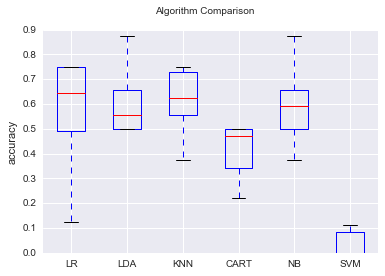

In [53]:
'''From http://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/'''
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
X = X
Y = y
# prepare configuration for cross validation test harness
num_folds = 10
num_instances = X.shape[0]
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X.toarray(), Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set(ylabel='accuracy')
plt.show()

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
# iris = datasets.load_iris()
# X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
# y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 2 while Y.shape[1] == 100